<a href="https://colab.research.google.com/github/Adeel-abbasi/DS-A/blob/main/20sw018_lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df = pd.read_csv('ab_data.csv')

In [3]:
users_unique = df.user_id.nunique()
users_unique

126377

In [6]:

# proportions of user who converted (i.e. converted = 1)
df[df.converted == 1].user_id.count()/df.shape[0]

# alternatively
df.converted.mean()
# there are two dimentions to this
# 1. get the number where landing_page equals new_page but group is not treatment
# 2. get the number where landing_page not new_page but group is treatment
# adding these two will give total misalignment
df[(df.landing_page == 'new_page') & (df.group != 'treatment')].user_id.count() + df[(df.landing_page != 'new_page') & (df.group == 'treatment')].user_id.count()

1755

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    1
converted       1
dtype: int64

In [11]:
df2 = df.drop(df[((df.landing_page == 'new_page') & (df.group != 'treatment')) | ((df.landing_page != 'new_page') & (df.group == 'treatment'))].index)


# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125357 entries, 0 to 127111
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       125357 non-null  int64  
 1   timestamp     125357 non-null  object 
 2   group         125357 non-null  object 
 3   landing_page  125356 non-null  object 
 4   converted     125356 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.7+ MB


In [10]:
df2.user_id.nunique()

125356

In [12]:
df2.user_id[df2.user_id.duplicated(keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

In [13]:
# we can remove duplicates in multiple ways
# removing by index, removing by first or last entry as well as by unique column timestamp
df2 = df2[df2.timestamp != '2017-01-09 05:37:58.781806']

In [14]:
# quick sanity check
df2.user_id.nunique()

125356

In [15]:
df2.converted.mean()

# alternativelyA
df2.describe().loc['mean'].converted

0.11970005185273823

In [17]:
# number of users who reamined with old page (i.e. group = control)
n_old = df2[df2.group == 'control'].count()[0]
n_old

62557

In [20]:

# same logic as above, here we do it for treatment instead of control
df2.converted[df2.group == 'treatment'].mean()

0.1193031625210994

In [21]:
# convert rate is how many users converted (i.e. converted = 1)
p_new = df2.converted.mean()
p_new

0.11970005185273823

In [22]:
p_old = df2.converted.mean() # the same!!!
p_old



# number of users who got the new page (i.e. group = treatment)
n_new = df2[df2.group == 'treatment'].count()[0]
n_new



# number of users who reamined with old page (i.e. group = control)
n_old = df2[df2.group == 'control'].count()[0]
n_old


# simulating n_new transaction that have probabiliy of receiving new page, using binomial gives the outout as the number of 1's
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()



# alternatively
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
new_converted_simulation.mean()

0.11969299977706296

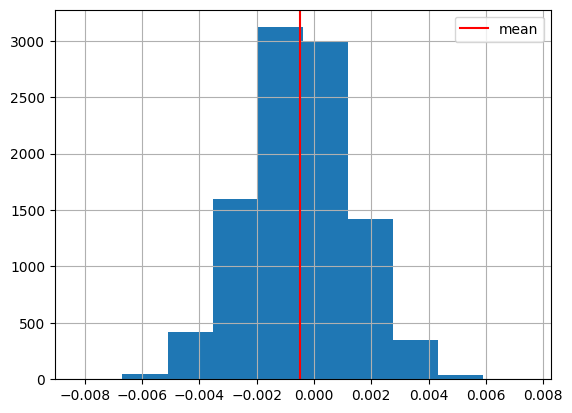

In [23]:
# simulating n_new transaction that have probabiliy of having old page, using binomial gives the outout as the number of 1's
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()



# alternatively
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
old_converted_simulation.mean()



# probabilty of new and old page based upon simulated values in e. and f.
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old



# alternatively
new_converted_simulation.mean() - old_converted_simulation.mean()


p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new)  # bootstrapping
    old_page_converted = np.random.binomial(1,p_old,n_old) # bootstrapping
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())


# alternatively
p_diffs_alt = new_converted_simulation - old_converted_simulation


# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)


# histogram
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

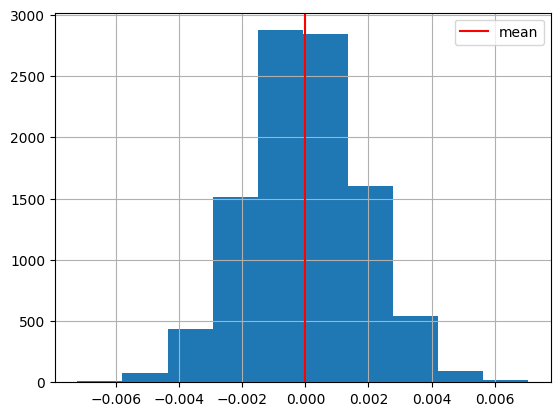

In [24]:

# alternatively
# histogram
plt.hist(p_diffs_alt)
plt.grid()
plt.axvline(p_diffs_alt.mean(), color='r', label='mean')
plt.legend();

In [25]:
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs).mean()



# alternatively
actual_diff = df2.converted[df2.group == 'treatment'].mean() - df2.converted[df2.group == 'control'].mean()
(actual_diff < p_diffs_alt).mean()



# quick check before diving in
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0


In [26]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()
n_old = df2[df2.group == 'control'].converted.count()
n_new = df2[df2.group == 'treatment'].converted.count()


# based upon the documentation
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value



# quick consistency check
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0.0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0.0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0.0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1.0
